# Building a Content-Based Recommender

Content based recommenders use indirect and generalizable representations of items

In [1]:
import sys 

sys.path.append("/Users/srmarshall/Desktop/code/personal/recommendation-systems/")

## Fetch Data

Get relevant data from Spotify API and prepare for reco system

In [2]:
from helpers import SpotifyClient
import os 

# instantiate client
sp = SpotifyClient(
    client_id=os.getenv("SP_CLIENT_ID"), 
    client_secret=os.getenv("SP_CLIENT_SECRET"),
    redirect_uri=os.getenv("SP_REDIRECT_URI")
)

# authenticate
scopes = "user-read-private user-read-email user-read-recently-played user-library-read"
res = sp.authorize_client(scopes=scopes)

Authenticate at the following URL making sure to copy the URL you are redirected to for the next step.
- https://accounts.spotify.com/authorize?response_type=code&client_id=fd76fa43d59e433b89d63e1ad594f8bb&scope=user-read-private+user-read-email+user-read-recently-played+user-library-read&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback&state=5oepm7fpCtroDkUH


In [3]:
# read my library 
track_ids = sp.read_user_library()

print(f"Total tracks found: {len(track_ids)}")

Total tracks found: 1716


In [4]:
# use ids to create a dataframe with track information
df = sp.get_audio_features(ids=track_ids)

In [5]:
display(df.head())
display(df.tail())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.756,0.672,0,-6.743,1,0.0522,0.4640,0.000003,0.108,0.739,114.935,audio_features,2uqYupMHANxnwgeiXTZXzd,spotify:track:2uqYupMHANxnwgeiXTZXzd,https://api.spotify.com/v1/tracks/2uqYupMHANxn...,https://api.spotify.com/v1/audio-analysis/2uqY...,171783,4
1,0.691,0.640,0,-6.441,1,0.3690,0.5110,0.000000,0.409,0.163,138.672,audio_features,6MF4tRr5lU8qok8IKaFOBE,spotify:track:6MF4tRr5lU8qok8IKaFOBE,https://api.spotify.com/v1/tracks/6MF4tRr5lU8q...,https://api.spotify.com/v1/audio-analysis/6MF4...,202040,4
2,0.677,0.766,6,-6.896,1,0.0568,0.0219,0.000007,0.129,0.198,123.062,audio_features,51Of5p3lKZeOg6itfs4og4,spotify:track:51Of5p3lKZeOg6itfs4og4,https://api.spotify.com/v1/tracks/51Of5p3lKZeO...,https://api.spotify.com/v1/audio-analysis/51Of...,190488,4
3,0.526,0.877,3,-4.369,0,0.0330,0.1720,0.010800,0.223,0.436,145.568,audio_features,1XrSjpNe49IiygZfzb74pk,spotify:track:1XrSjpNe49IiygZfzb74pk,https://api.spotify.com/v1/tracks/1XrSjpNe49Ii...,https://api.spotify.com/v1/audio-analysis/1XrS...,255067,3
4,0.720,0.880,9,-2.834,1,0.1010,0.0562,0.060000,0.153,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
11,0.556,0.908,5,-4.759,0,0.2450,0.3010,0.000000,0.1290,0.715,158.151,audio_features,2wQVmS0j4xcSbEK8CLEgwz,spotify:track:2wQVmS0j4xcSbEK8CLEgwz,https://api.spotify.com/v1/tracks/2wQVmS0j4xcS...,https://api.spotify.com/v1/audio-analysis/2wQV...,209360,4
12,0.548,0.839,6,-2.371,1,0.0644,0.1350,0.000000,0.1020,0.314,98.932,audio_features,4QVS8YCpK71R4FsxSMCjhP,spotify:track:4QVS8YCpK71R4FsxSMCjhP,https://api.spotify.com/v1/tracks/4QVS8YCpK71R...,https://api.spotify.com/v1/audio-analysis/4QVS...,218296,4
13,0.757,0.832,4,-3.318,0,0.0758,0.0384,0.002410,0.6610,0.386,125.894,audio_features,5vsRm2aCBl5T2qdpvwtrf6,spotify:track:5vsRm2aCBl5T2qdpvwtrf6,https://api.spotify.com/v1/tracks/5vsRm2aCBl5T...,https://api.spotify.com/v1/audio-analysis/5vsR...,217933,4
14,0.713,0.452,1,-9.638,1,0.0295,0.8410,0.003800,0.1050,0.235,102.963,audio_features,0pdKRp2sUthTPe7RLWpPqQ,spotify:track:0pdKRp2sUthTPe7RLWpPqQ,https://api.spotify.com/v1/tracks/0pdKRp2sUthT...,https://api.spotify.com/v1/audio-analysis/0pdK...,218883,4
15,0.671,0.529,0,-7.226,1,0.3070,0.0769,0.000335,0.0856,0.203,161.989,audio_features,4VXIryQMWpIdGgYR4TrjT1,spotify:track:4VXIryQMWpIdGgYR4TrjT1,https://api.spotify.com/v1/tracks/4VXIryQMWpId...,https://api.spotify.com/v1/audio-analysis/4VXI...,165820,4


In [6]:
# write data to folder for future use 
df.to_csv("saved_track_features.csv", index=False)

## Random Item Recommender

Suggest a random `n` items to a user

In [8]:
def random_item_recommender(item_df, n_items, replace=False, random_state=None):
    """
    Select n random items from a provided item dataframe

    Args: 
        - item_df (pd.DataFrame): DataFrame of items to recommend
        - n_items (int): Number of items to return 
        - replace (bool): Should we select with replacement?
        - random_state (int): Seed for random number generator

    Returns: 
        - df (pd.DataFrame): DataFrame of randomly selected items
    """

    if n_items > len(item_df) and not replace:
        raise ValueError("n value cannot be greater than total item pool if sampling without replacement")
    
    return df.sample(n_items, replace=replace, random_state=random_state)

In [9]:
random_item_recommender(item_df=df, n_items=10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
56,0.635,0.858,6,-3.012,0,0.2300,0.04020,0.000289,0.3090,0.693,92.013,audio_features,6tBKe09rPPw9gvhH7KiPtv,spotify:track:6tBKe09rPPw9gvhH7KiPtv,https://api.spotify.com/v1/tracks/6tBKe09rPPw9...,https://api.spotify.com/v1/audio-analysis/6tBK...,171307,4
8,0.451,0.931,9,-3.871,1,0.0719,0.00076,0.004900,0.3610,0.172,122.961,audio_features,1jJci4qxiYcOHhQR247rEU,spotify:track:1jJci4qxiYcOHhQR247rEU,https://api.spotify.com/v1/tracks/1jJci4qxiYcO...,https://api.spotify.com/v1/audio-analysis/1jJc...,302840,4
85,0.428,0.479,5,-9.758,0,0.2130,0.53500,0.000000,0.1000,0.464,165.927,audio_features,1QuzPovD4fnVy8KezHv7rI,spotify:track:1QuzPovD4fnVy8KezHv7rI,https://api.spotify.com/v1/tracks/1QuzPovD4fnV...,https://api.spotify.com/v1/audio-analysis/1Quz...,187952,3
41,0.650,0.583,10,-7.535,0,0.2230,0.45500,0.000114,0.6470,0.335,135.026,audio_features,3zUhzxygBLNN1HZQhkDqRT,spotify:track:3zUhzxygBLNN1HZQhkDqRT,https://api.spotify.com/v1/tracks/3zUhzxygBLNN...,https://api.spotify.com/v1/audio-analysis/3zUh...,248907,4
38,0.740,0.648,10,-7.571,1,0.3000,0.37900,0.000134,0.2310,0.373,62.056,audio_features,7ovsrGkfcZhLuXPtN4Z2qC,spotify:track:7ovsrGkfcZhLuXPtN4Z2qC,https://api.spotify.com/v1/tracks/7ovsrGkfcZhL...,https://api.spotify.com/v1/audio-analysis/7ovs...,175765,4
8,0.269,0.332,2,-10.153,1,0.0331,0.03040,0.000012,0.0879,0.274,75.717,audio_features,0Z1jSa9OzaVXERNOpH3F9J,spotify:track:0Z1jSa9OzaVXERNOpH3F9J,https://api.spotify.com/v1/tracks/0Z1jSa9OzaVX...,https://api.spotify.com/v1/audio-analysis/0Z1j...,321227,4
91,0.370,0.403,3,-7.997,1,0.0260,0.82200,0.064900,0.1060,0.179,155.049,audio_features,1X3T2J7S1s6aCIbmjFf2NG,spotify:track:1X3T2J7S1s6aCIbmjFf2NG,https://api.spotify.com/v1/tracks/1X3T2J7S1s6a...,https://api.spotify.com/v1/audio-analysis/1X3T...,241917,3
46,0.576,0.750,4,-6.948,1,0.0275,0.00665,0.000441,0.0661,0.659,95.018,audio_features,0glI0Qi04BEuaNWNh5Wytr,spotify:track:0glI0Qi04BEuaNWNh5Wytr,https://api.spotify.com/v1/tracks/0glI0Qi04BEu...,https://api.spotify.com/v1/audio-analysis/0glI...,237474,4
85,0.733,0.678,6,-7.771,1,0.4380,0.12100,0.000000,0.3440,0.841,175.985,audio_features,5PTG6rrL6EPFD9E2QMI2pl,spotify:track:5PTG6rrL6EPFD9E2QMI2pl,https://api.spotify.com/v1/tracks/5PTG6rrL6EPF...,https://api.spotify.com/v1/audio-analysis/5PTG...,142000,4
20,0.660,0.582,7,-7.769,1,0.0602,0.49900,0.000603,0.2570,0.402,117.902,audio_features,2JiOQUqMlUkwcbvv3rtSC9,spotify:track:2JiOQUqMlUkwcbvv3rtSC9,https://api.spotify.com/v1/tracks/2JiOQUqMlUkw...,https://api.spotify.com/v1/audio-analysis/2JiO...,263192,4


## k-NN Recommender

Build a k-Nearest Neighbors recommender for content

Selection Criteria:
- k-NN is simple and requires no trainig
- Directly measures similarity between items 
- No assumptions are applied to the underlying data
- Distance metric flexbility

Let's start here and see what we get in return

### EDA

Try and get a better feel for the data, its patterns, and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1716 entries, 0 to 15
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1716 non-null   float64
 1   energy            1716 non-null   float64
 2   key               1716 non-null   int64  
 3   loudness          1716 non-null   float64
 4   mode              1716 non-null   int64  
 5   speechiness       1716 non-null   float64
 6   acousticness      1716 non-null   float64
 7   instrumentalness  1716 non-null   float64
 8   liveness          1716 non-null   float64
 9   valence           1716 non-null   float64
 10  tempo             1716 non-null   float64
 11  type              1716 non-null   object 
 12  id                1716 non-null   object 
 13  uri               1716 non-null   object 
 14  track_href        1716 non-null   object 
 15  analysis_url      1716 non-null   object 
 16  duration_ms       1716 non-null   int64  
 17  ti

In [8]:
# review summary stats
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000
mean,0.646557,0.616783,5.047203,-6.886680,0.675991,0.102867,0.236670,0.024264,0.176317,0.445368,119.087913,210185.354895,3.962704
std,0.135736,0.174515,3.568830,2.631296,0.468140,0.100423,0.253569,0.103495,0.137204,0.207184,28.210192,41646.307801,0.306977
min,0.209000,0.064800,0.000000,-18.860000,0.000000,0.022900,0.000017,0.000000,0.021700,0.038800,59.343000,86831.000000,1.000000
25%,0.557750,0.498750,1.000000,-8.365000,0.000000,0.038600,0.037275,0.000000,0.096675,0.286000,96.091750,183339.000000,4.000000
50%,0.653000,0.625000,5.000000,-6.426500,1.000000,0.056350,0.131000,0.000006,0.124000,0.433500,118.035500,205470.000000,4.000000
75%,0.744000,0.749000,8.000000,-5.068000,1.000000,0.126000,0.366000,0.000628,0.210000,0.588000,139.008000,231678.250000,4.000000
max,0.974000,0.972000,11.000000,-0.930000,1.000000,0.650000,0.979000,0.919000,0.956000,0.968000,205.348000,461840.000000,5.000000


In [9]:
# check for missing values
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [76]:
# pull out desired features
features_df = df.iloc[:, :11]

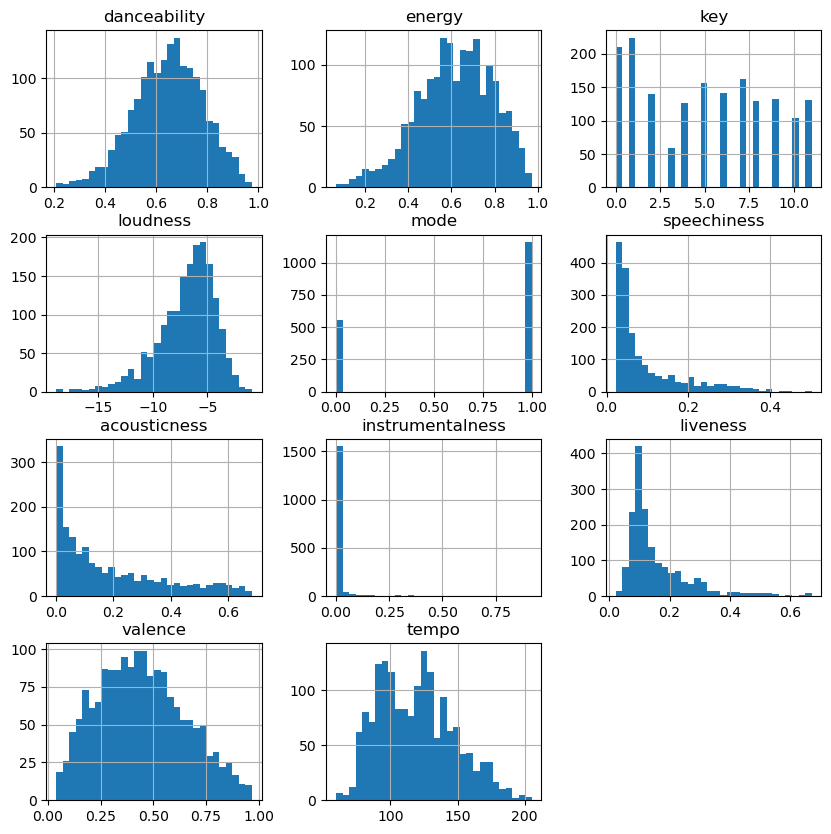

In [77]:
import matplotlib.pyplot as plt 

# lets see how the features are distributed
features_df.hist(bins=30, figsize=(10, 10))
plt.show()

**Histogram Takeaways:**
- A handful of features are relatively normally distributed but not all
    - `speechiness`, `acousticness`, and `liveness` all display positive skew and may benifit from a log transformation
- Features appear on different scales
    - To ensure no feature impacts distance calculations more than another, apply standard scaling
- Some features are categorial while others are continuous
    - `instrumentalness` is binary and we can leave it as it
    - `key` appears to be categorical, lets one-hot encode it

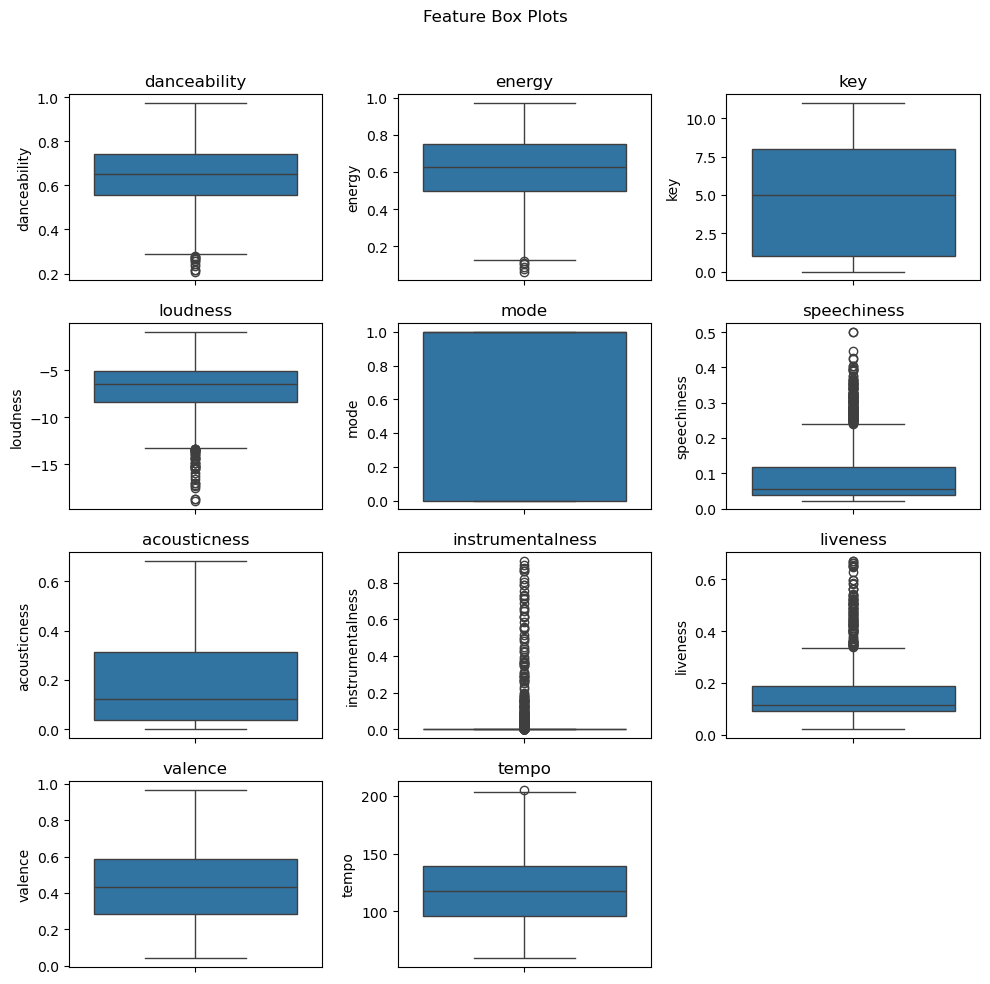

In [78]:
import seaborn as sns 

fig, axes = plt.subplots(4, 3, figsize=(10, 10))
fig.suptitle("Feature Box Plots")

axes = axes.flatten()

for i, column in enumerate(features_df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [49]:
# confirm key is a categorial variable
features_df["key"].value_counts()

key
1     224
0     210
7     163
5     156
6     141
2     140
9     132
11    131
8     130
4     126
10    104
3      59
Name: count, dtype: int64

**Processing Plan**
- Log transform positively skewed features 
- One-hot encode categorial features 
- Scale continuous features

In [80]:
import numpy as np 

# log transform positive skew features
features_df["speechiness"] = np.log1p(df["speechiness"])
features_df["acousticness"] = np.log1p(df["acousticness"])
features_df["liveness"] = np.log1p(df["liveness"])

In [96]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.756,0.672,0,-6.743,1,0.049631,0.322933,0.000003,0.097632,0.739,114.935
1,0.691,0.640,0,-6.441,1,0.273137,0.345554,0.000000,0.294817,0.163,138.672
2,0.677,0.766,6,-6.896,1,0.053773,0.021432,0.000007,0.114518,0.198,123.062
3,0.526,0.877,3,-4.369,0,0.031951,0.147309,0.010800,0.183410,0.436,145.568
4,0.720,0.880,9,-2.834,1,0.091867,0.053235,0.060000,0.133103,0.463,180.011
...,...,...,...,...,...,...,...,...,...,...,...
11,0.556,0.908,5,-4.759,0,0.198142,0.233595,0.000000,0.114518,0.715,158.151
12,0.548,0.839,6,-2.371,1,0.060541,0.119233,0.000000,0.092695,0.314,98.932
13,0.757,0.832,4,-3.318,0,0.070519,0.036988,0.002410,0.410399,0.386,125.894
14,0.713,0.452,1,-9.638,1,0.028659,0.476426,0.003800,0.095170,0.235,102.963


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd 

# define continous columns
cont_cols = ["danceability", "energy", "loudness", "speechiness", "acousticness",
             "instrumentalness", "liveness", "valence", "tempo"]

# instantiate scaler 
scaler = StandardScaler()

# create column transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, cont_cols)
    ], 
    remainder="passthrough"
)

# fit and transform 
scaled_features = preprocessor.fit_transform(features_df)

# convert back to df 
scaled_features_df = pd.DataFrame(scaled_features, columns=cont_cols + ["key", "mode"])

In [100]:
scaled_features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode
0,0.806530,0.316493,0.054620,-0.516147,1.053670,-0.234478,-0.529417,1.417665,-0.147256,0.0,1.0
1,0.327518,0.133075,0.169426,2.551787,1.205052,-0.234511,1.834546,-1.363279,0.694423,0.0,1.0
2,0.224346,0.855285,-0.003543,-0.459286,-0.964022,-0.234445,-0.326980,-1.194298,0.140915,6.0,1.0
3,-0.888435,1.491518,0.957100,-0.758825,-0.121635,-0.130128,0.498941,-0.045227,0.938945,3.0,0.0
4,0.541231,1.508713,1.540633,0.063600,-0.751192,0.345395,-0.104172,0.085129,2.160242,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1711,-0.667353,1.669205,0.808841,1.522374,0.455809,-0.234511,-0.326980,1.301793,1.385119,5.0,0.0
1712,-0.726308,1.273709,1.716643,-0.366390,-0.309522,-0.234511,-0.588605,-0.634247,-0.714699,6.0,1.0
1713,0.813899,1.233586,1.356640,-0.229434,-0.859918,-0.211218,3.220215,-0.286629,0.241334,4.0,0.0
1714,0.489645,-0.944509,-1.045919,-0.804021,2.080874,-0.197783,-0.558934,-1.015661,-0.571765,1.0,1.0


In [103]:
# create dummy vars for key values 
scaled_dummy_df = pd.get_dummies(scaled_features_df, columns=["key"], dtype=int)

### Model Creation 

In [104]:
from sklearn.model_selection import train_test_split

# create train/test split 
X_train, X_test = train_test_split(scaled_dummy_df, test_size=0.2, random_state=42)

In [105]:
from sklearn.neighbors import NearestNeighbors

# initialize model 
knn = NearestNeighbors(n_neighbors=5, metric="cosine")

In [106]:
# fit the model 
knn.fit(X_train)

NearestNeighbors(metric='cosine')

### Model Evaluation

In [110]:
X_test

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
599,-1.212690,-0.990364,-1.443177,-0.676956,2.251137,3.467218,-0.317519,-0.952897,0.027022,1.0,...,1,0,0,0,0,0,0,0,0,0
1347,0.121174,0.454057,0.339354,-0.734416,-0.750592,-0.234450,0.523366,0.017537,0.740802,1.0,...,0,0,0,0,0,0,0,0,0,1
115,-2.436012,0.075756,0.351139,0.243078,1.076742,2.297743,0.350050,-0.639075,-1.044073,1.0,...,0,0,0,1,0,0,0,0,0,0
135,0.843377,-0.182176,0.019646,-0.708818,-0.824706,-0.234511,0.990017,1.494914,-0.465284,0.0,...,0,0,0,0,0,0,0,0,0,1
339,-1.323231,0.855285,-0.221370,1.357416,1.404564,-0.234495,3.319721,0.476200,1.807217,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,-0.969499,1.170536,1.731089,-0.785906,-1.054733,-0.234511,-0.824425,-0.098336,-1.137967,1.0,...,0,0,0,0,0,0,0,0,0,0
107,-0.040953,-0.107662,-0.008105,-0.671872,-0.383655,-0.234495,0.179732,0.268595,0.105634,0.0,...,1,0,0,0,0,0,0,0,0,0
1006,0.718097,0.809430,0.146617,1.683047,-1.014400,-0.234393,0.416725,0.485856,0.666765,1.0,...,1,0,0,0,0,0,0,0,0,0
1697,1.241325,0.545766,0.878029,0.864920,0.032163,-0.234511,-0.177464,1.292137,-0.994821,1.0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
test = X_test.iloc[0].values.reshape(1, -1)

In [117]:
distances, indices = knn.kneighbors(test)

/Users/srmarshall/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
